In [1]:
import tensorflow as tf
import random
import math
import time
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def to_ndarray(list):
    lgt = len(list)
    x = np.zeros((1,lgt),dtype ='float')
    for i in range(0,lgt):
        x[0,i]=list[i]
    return x

# parameter setting

In [3]:
sample_num = 501
hiddenDim = 10
training_step = 1001
rate = 0.01

# iNPUT / OUTPUT setting

In [14]:
x = np.random.normal(0.0 , 5.0 , sample_num)
y = map(lambda x: math.sin(x), x)

In [15]:
x_data = to_ndarray(x)
y_data = to_ndarray(y)

In [16]:
W = weight_variable([hiddenDim,1])
b = bias_variable([hiddenDim,1])

W2 = weight_variable([1,hiddenDim])
b2 = bias_variable([1])

X = tf.placeholder("float",[1,None])

hidden = tf.nn.sigmoid(tf.matmul(W,X)+b)
regression = tf.matmul(W2,hidden) + b2

loss = tf.reduce_mean(tf.square( y_data - regression))

step = tf.Variable(0,trainable=False)
#rate = tf.train.exponential_decay(0.15, step,1, 0.9999)

optimizer = tf.train.AdamOptimizer(rate)
train = optimizer.minimize(loss, global_step = step)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

start_time = time.time()
for step in xrange(training_step):
    train.run({X: x_data},sess)
    if step % 100 == 0:
        print step, loss.eval({X: x_data},sess)

excute_time = time.time() - start_time

0 1.35471e+17
100 1.35471e+17
200 1.35471e+17
300 1.35471e+17
400 1.35471e+17
500 1.35471e+17
600 1.35471e+17
700 1.35471e+17
800 1.35471e+17
900 1.35471e+17
1000 1.35471e+17


# Setting X - test

In [17]:
x_test = np.linspace(-.0 , 15.0, 100*sample_num)
y_test = regression.eval({X:to_ndarray(x_test)},sess)

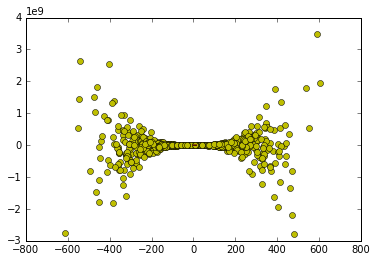

Sample number :  1000
learning rates :  0.01
Training steps :  1000
Hidden dimentions :  10
Final loss value :  1.35471e+17
Excute time :  0.767459869385  sec


In [18]:
plt.plot(x_data,y_data,'yo')
plt.plot(x_test,y_test.transpose().tolist(),'r-')
plt.plot(x_test,map(lambda x_test: math.sin(x_test), x_test),'k-')
plt.show()
print "Sample number : ", sample_num -1 
print "learning rates : ", rate
print "Training steps : ", training_step -1
print "Hidden dimentions : ", hiddenDim
print "Final loss value : ", loss.eval({X: x_data},sess)
print "Excute time : ", excute_time , " sec"